In [1]:
#0.사용자 지정함수 설정,라이브러리 임포트
!pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

!pip install keybert
!pip install transformers
!pip install kiwipiepy

from keybert import KeyBERT
from kiwipiepy import Kiwi
from transformers import BertModel


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.3 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.8.3-py3-none-any.whl size=39124 sha256=2236072a0f745363e052618fd59c7cfe67a684493ec3dcedb1e1aa598ea9f57c
  Stored in directory: /root/.cache/pip/wheels/70/88/07/1a3bc11fd1dd5f89924a02dcbca89a3015e25e8faa31f904dc
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=a038627339a0868b7be28c7f7d4a96c685bf6406ca0b30ae55a668a1db090350
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built keybert sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 22.4 MB/s eta 0:00:00
  Pr

#1.데이터 불러오기(데이터형확인)(dim,shape)
dataset = pd.read_csv('db.sheet.csv')  #파일 시스템을 통해 CSV 파일 구조를 확인해보자.
print('db.sheet.csv)

In [2]:
#1.데이터 불러오기(데이터형확인)(dim,shape)
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/db.sheet.csv'
dataset = pd.read_csv(file_path,header=None)

# 데이터 확인
print(dataset)
print(dataset.dtypes)# 각 열의 데이터 타입 확인
print(dataset.shape)# 데이터의 행과 열의 개수 확인

#titleSet keywordSet나누기
X = dataset.iloc[:, 1] #titleSet

#출력
print("X_dataset")
print(X)
print("X_shape")
print(X.shape)

Mounted at /content/drive
      0                                                  1       2     3  \
0    경력                           [채용] 본교 인재개발원 연구원 채용 공고     인재개발   연구원   
1    경력  [인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....    경제협회    채용   
2    경력                               [채용] 산학협력단 직원 채용 공고    산학협력단    직원   
3    학사  [글로벌소통교육실] 겨울계절학기 영어 말하기프로그램 Speaking Master P...  겨울계절학기    영어   
4    일반  [언어교육원] 2023학년도 싱가포르 NTU 난양공대 위탁과정 언어교육원 한국어도우...    싱가포르  언어교육   
..   ..                                                ...     ...   ...   
215  일반             [채용]이화여자대학교 산학협력단 직원(사업관리 및 정산) 채용 공고    산학협력단    직원   
216  일반                      [조교모집] 23-2 건축학전공 A/B급 조교 모집      건축학     A   
217  일반             [정책과학대학원] 2023학년도 2학기 B급 학생조교 모집 (마감)     정책과학    B급   
218  일반                      [조교모집] 2023-2학기 수학과 B급 조교 모집      수학과    B급   
219  일반                [교육혁신센터] 맞춤형 튜터링 튜터(가르치는 학생) 모집 안내      맞춤형   튜터링   

           4    5  
0         채용  NaN  
1        상담회  NaN  
2

In [3]:
#필요한 라이브러리 불러오기(분해 이전)

import numpy as np

!pip install kiwipiepy
from kiwipiepy import Kiwi

from keybert import KeyBERT
from transformers import BertModel

model = BertModel.from_pretrained('skt/kobert-base-v1')
kw_model = KeyBERT(model)

config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [4]:
import re

# Kiwi 형태소 분석기 초기화
kiwi = Kiwi()

# 정규표현식을 사용하여 알파벳이 포함된 단어를 걸러내는 패턴
alphabet_pattern = re.compile('[a-zA-Z]')

# 각 행의 키워드를 저장할 리스트
X_kiwi = []

# 각 행을 처리하여 키워드 추출 후 저장
for title in X:
    # Kiwi 형태소 분석 수행
    kiwi_result = kiwi.analyze(title)

    # 명사 추출 함수
    def noun_extractor_kiwi(kiwi_result):
        nouns = []
        for token, pos, _, _ in kiwi_result[0][0]:
            if len(token) != 1 and (pos.startswith('N') or pos.startswith('SL')) and not alphabet_pattern.search(token):
                nouns.append(token)
        return nouns

    # 명사 추출
    nouns = noun_extractor_kiwi(kiwi_result)

    # 추출된 명사를 X_kiwi에 추가
    X_kiwi.append(nouns)

for i in range(len(X_kiwi)):
  print(X_kiwi[i])


['채용', '본교', '인재', '개발원', '연구원', '채용', '공고']
['인재', '개발원', '채용', '상담회', '한국', '경제인', '협회', '전국경제인연합회', '채용', '상담회']
['채용', '산학', '협력단', '직원', '채용', '공고']
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록', '안내']
['언어', '교육원', '학년도', '싱가포르', '공대', '위탁', '과정', '언어', '교육원', '한국어', '도우미', '모집']
['교육', '혁신', '센터', '융합', '수업', '운영', '사례', '공유', '융합', '수업', '운영', '사례', '발표', '전시', '안내']
['인재', '개발원', '학년도', '겨울', '방학', '현장', '실습', '모집', '안내']
['학년도', '전기', '졸업', '예정', '여부', '조회', '졸업', '의사', '신청', '관련', '안내']
['국제', '학생증', '발급', '지원', '행사', '안내']
['학년도', '전공', '변경', '시행', '안내']
['학년도', '시행', '안내']
['국제', '교류', '싱가포르', '교환', '프로그램', '설명회']
['대학', '건강', '센터', '학생', '건강', '검사', '시행', '안내']
['연구윤리', '센터', '연구윤리', '특강', '신청', '안내']
['학부', '학년도', '학기', '이화', '플러스', '장학금', '신청', '안내']
['다문화', '연구소', '상호', '문화', '학술', '대회', '외국', '한국', '상호', '문화', '교육', '관점']
['학부', '방일영', '문화', '재단', '장학', '선발', '안내', '북한이탈주민', '대학', '지원']
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록

#2.모델 플로우: 키위=>형태소 분리=>패딩=>키버트 사용=>top_1출력


In [5]:
#KIWI=KIWI_COMBINED(목적; 코버트 사용을 위해 리스트에서 문자열로 JOIN
# x 리스트에 있는 문자열들을 join하여 하나의 문자열로 합치기

X_kiwi_combined = [' '.join(sentence) for sentence in X_kiwi]
print(len(X_kiwi_combined))
print(X_kiwi_combined)

#k_kiwi값 엑셀에 자동저장(num=217,header가 추가됨)
!pip install xlsxwriter
df_kiwi = pd.DataFrame(X_kiwi)
file_path = '/content/drive/MyDrive/kiwi_auto.xlsx'
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    df_kiwi.to_excel(writer, sheet_name='kiwi_auto', index=False)

print(len(X_kiwi_combined))


220
['채용 본교 인재 개발원 연구원 채용 공고', '인재 개발원 채용 상담회 한국 경제인 협회 전국경제인연합회 채용 상담회', '채용 산학 협력단 직원 채용 공고', '글로벌 소통 교육실 겨울 계절 학기 영어 말하기 프로그램 등록 안내', '언어 교육원 학년도 싱가포르 공대 위탁 과정 언어 교육원 한국어 도우미 모집', '교육 혁신 센터 융합 수업 운영 사례 공유 융합 수업 운영 사례 발표 전시 안내', '인재 개발원 학년도 겨울 방학 현장 실습 모집 안내', '학년도 전기 졸업 예정 여부 조회 졸업 의사 신청 관련 안내', '국제 학생증 발급 지원 행사 안내', '학년도 전공 변경 시행 안내', '학년도 시행 안내', '국제 교류 싱가포르 교환 프로그램 설명회', '대학 건강 센터 학생 건강 검사 시행 안내', '연구윤리 센터 연구윤리 특강 신청 안내', '학부 학년도 학기 이화 플러스 장학금 신청 안내', '다문화 연구소 상호 문화 학술 대회 외국 한국 상호 문화 교육 관점', '학부 방일영 문화 재단 장학 선발 안내 북한이탈주민 대학 지원', '글로벌 소통 교육실 겨울 계절 학기 영어 말하기 프로그램 등록 안내', '글로벌 소통 교육실 겨울 계절 학기 고급 영어 글쓰기 등록 안내', '인권 센터 인권 센터 젠더 교육 플랫폼 폭력 예방 특강 신청 안내', '인재 개발원 진로 디자인 세계 진로 특강', '학부 년도 전기공사공제조합 장학회 장학 선발 안내', '학생 서비스 센터 물건 확인', '미래 혁신 센터 대학 혁신 지원 사업 학생 인식 조사 시행 안내', '채용 사회 과학 대학 사회학 사무실 계약 직원 채용 공고', '학년도 전공 학과 결정 시행 안내', '출판문화 이화 플래너 이화 달력 출시 기념 팝업 스토어', '조교 모집 학년도 학기 체육 학부 행정실 조교 모집', '학년도 사범대 교직 과정 이수 신청 안내', '모집 년도 창업 교육 혁신 선도 대학 대학 스타트업 애널리스트 모집', '공연 문화 연구 센터 평화 음악회 강당 공연 안내', '글로

In [6]:
#bert_keyword초기화
bert_keyword=[]

# X_kiwi_combined의 길이만큼 반복: 모든 단어의 중요도 출력
for i in range(len(X_kiwi_combined)):
    # 키워드 추출
    keywords = kw_model.extract_keywords(X_kiwi_combined[i], keyphrase_ngram_range=(1, 1), stop_words=None, top_n=1)

    # bert_keyword 에 키워드 추가
    bert_keyword.append(keywords)

for i, value in enumerate(bert_keyword):
    print(f"value at index {i}: {value}")

value at index 0: [('공고', 0.7976)]
value at index 1: [('협회', 0.7234)]
value at index 2: [('공고', 0.7352)]
value at index 3: [('영어', 0.5199)]
value at index 4: [('싱가포르', 0.6966)]
value at index 5: [('수업', 0.5876)]
value at index 6: [('학년도', 0.8406)]
value at index 7: [('학년도', 0.8442)]
value at index 8: [('국제', 0.8671)]
value at index 9: [('학년도', 0.9189)]
value at index 10: [('학년도', 0.9569)]
value at index 11: [('싱가포르', 0.6962)]
value at index 12: [('안내', 0.7502)]
value at index 13: [('연구윤리', 0.8173)]
value at index 14: [('학년도', 0.8401)]
value at index 15: [('다문화', 0.6997)]
value at index 16: [('대학', 0.703)]
value at index 17: [('영어', 0.5199)]
value at index 18: [('글쓰기', 0.5861)]
value at index 19: [('폭력', 0.5651)]
value at index 20: [('디자인', 0.7502)]
value at index 21: [('전기공사공제조합', 0.6929)]
value at index 22: [('학생', 0.5215)]
value at index 23: [('혁신', 0.5841)]
value at index 24: [('채용', 0.7076)]
value at index 25: [('학년도', 0.9211)]
value at index 26: [('스토어', 0.728)]
value at index 27:

In [7]:
#위의 bert_keyword df화

import pandas as pd

# 주어진 데이터:bert_keyword

# DataFrame으로 변환
df = pd.DataFrame([(item[0], item[1]) for sublist in bert_keyword for item in sublist], columns=['단어', '중요도'])

# 결과 출력
display(df)


,단어,중요도
0,공고,0.7976
1,협회,0.7234
2,공고,0.7352
3,영어,0.5199
4,싱가포르,0.6966
...,...,...
215,관리,0.7370
216,건축학,0.7515
217,학기,0.7438
218,학기,0.8285


In [8]:
def pad_sequence(sequence, max_length, padding_value=0):
    padded_sequence = sequence[:max_length] + [padding_value] * max(0, max_length - len(sequence))
    return padded_sequence

# 최대 길이
max_length = 20

# 패딩된 결과
padded_X_kiwi = [pad_sequence(row, max_length) for row in X_kiwi]

# 결과 출력
for row in padded_X_kiwi:
    print(row)

# DataFrame 생성
df_kiwi = pd.DataFrame(X_kiwi)

# 패딩된 DataFrame 생성
df_padded_X = pd.DataFrame(padded_X_kiwi)

# 패딩된 값을 0으로 변경
df_padded_X.replace('NULL', 0, inplace=True)

# 엑셀 파일로 저장
file_path = '/content/drive/MyDrive/padded_X.xlsx'
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    df_padded_X.to_excel(writer, sheet_name='padded_X', index=False)


['채용', '본교', '인재', '개발원', '연구원', '채용', '공고', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['인재', '개발원', '채용', '상담회', '한국', '경제인', '협회', '전국경제인연합회', '채용', '상담회', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['채용', '산학', '협력단', '직원', '채용', '공고', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0]
['언어', '교육원', '학년도', '싱가포르', '공대', '위탁', '과정', '언어', '교육원', '한국어', '도우미', '모집', 0, 0, 0, 0, 0, 0, 0, 0]
['교육', '혁신', '센터', '융합', '수업', '운영', '사례', '공유', '융합', '수업', '운영', '사례', '발표', '전시', '안내', 0, 0, 0, 0, 0]
['인재', '개발원', '학년도', '겨울', '방학', '현장', '실습', '모집', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['학년도', '전기', '졸업', '예정', '여부', '조회', '졸업', '의사', '신청', '관련', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0]
['국제', '학생증', '발급', '지원', '행사', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['학년도', '전공', '변경', '시행', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['학년도', '시행', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['국제', '교류', 

In [9]:
print(padded_X_kiwi[0])

['채용', '본교', '인재', '개발원', '연구원', '채용', '공고', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 3.총 출력사항

(1)패딩 후 키위(df)

(2)bert_keyword(df)

In [10]:
df_X = pd.DataFrame(padded_X_kiwi)

# 결과 출력
print(df_X)

df_keyword = pd.DataFrame(bert_keyword)

# 튜플 분해 및 새로운 열 생성
df_keyword[['단어', '중요도']] = pd.DataFrame(df_keyword[0].tolist(), index=df_keyword.index)

# 기존 열 삭제
df_keyword = df_keyword.drop(columns=[0])

# 결과 출력
print(df_keyword)


       0        1    2     3    4    5   6         7     8    9    10  11 12  \
0      채용       본교   인재   개발원  연구원   채용  공고         0     0    0    0   0  0   
1      인재      개발원   채용   상담회   한국  경제인  협회  전국경제인연합회    채용  상담회    0   0  0   
2      채용       산학  협력단    직원   채용   공고   0         0     0    0    0   0  0   
3     글로벌       소통  교육실    겨울   계절   학기  영어       말하기  프로그램   등록   안내   0  0   
4      언어      교육원  학년도  싱가포르   공대   위탁  과정        언어   교육원  한국어  도우미  모집  0   
..    ...      ...  ...   ...  ...  ...  ..       ...   ...  ...  ...  .. ..   
215    채용  이화여자대학교   산학   협력단   직원   사업  관리        정산    채용   공고    0   0  0   
216    조교       모집  건축학    전공   조교   모집   0         0     0    0    0   0  0   
217  정책과학      대학원  학년도    학기   학생   조교  모집        마감     0    0    0   0  0   
218    조교       모집   학기   수학과   조교   모집   0         0     0    0    0   0  0   
219    교육       혁신   센터    맞춤  튜터링   튜터  학생        모집    안내    0    0   0  0   

    13 14 15 16 17 18 19  
0    0  0  0

In [11]:
# df와 bert_keyword를 수평으로 연결
result_df = pd.concat([df_X,df_keyword], axis=1)

# 결과 출력
display(result_df)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,단어,중요도
0,채용,본교,인재,개발원,연구원,채용,공고,0,0,0,...,0,0,0,0,0,0,0,0,공고,0.7976
1,인재,개발원,채용,상담회,한국,경제인,협회,전국경제인연합회,채용,상담회,...,0,0,0,0,0,0,0,0,협회,0.7234
2,채용,산학,협력단,직원,채용,공고,0,0,0,0,...,0,0,0,0,0,0,0,0,공고,0.7352
3,글로벌,소통,교육실,겨울,계절,학기,영어,말하기,프로그램,등록,...,0,0,0,0,0,0,0,0,영어,0.5199
4,언어,교육원,학년도,싱가포르,공대,위탁,과정,언어,교육원,한국어,...,0,0,0,0,0,0,0,0,싱가포르,0.6966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,채용,이화여자대학교,산학,협력단,직원,사업,관리,정산,채용,공고,...,0,0,0,0,0,0,0,0,관리,0.7370
216,조교,모집,건축학,전공,조교,모집,0,0,0,0,...,0,0,0,0,0,0,0,0,건축학,0.7515
217,정책과학,대학원,학년도,학기,학생,조교,모집,마감,0,0,...,0,0,0,0,0,0,0,0,학기,0.7438
218,조교,모집,학기,수학과,조교,모집,0,0,0,0,...,0,0,0,0,0,0,0,0,학기,0.8285


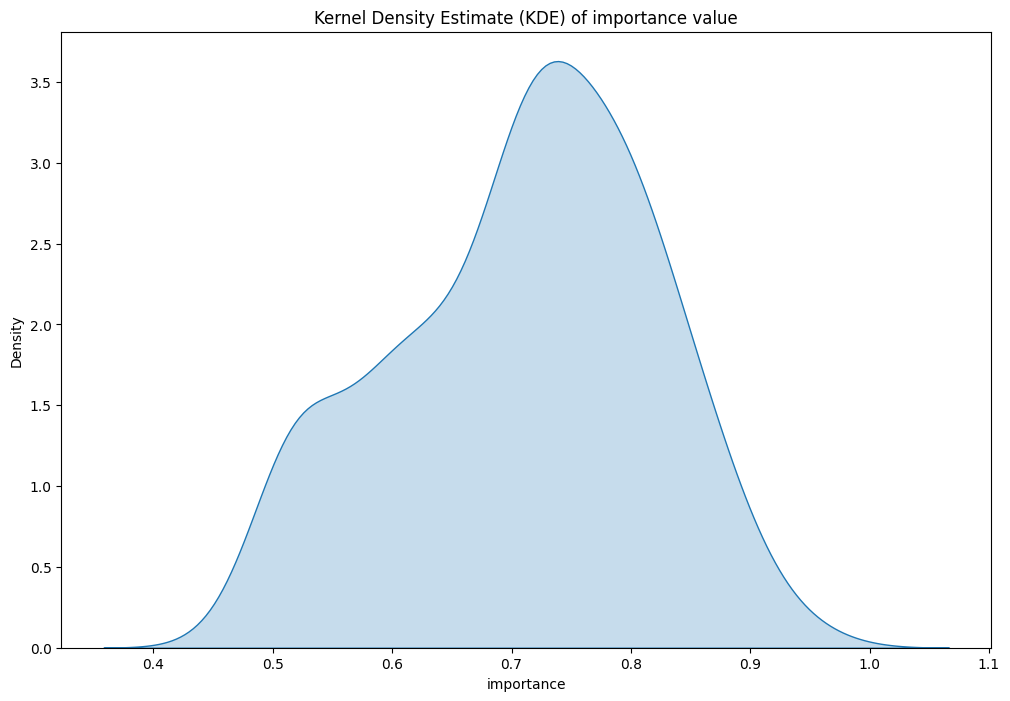

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 21번째 열의 값을 가져옵니다. (컴퓨터에서는 20번째 열로 인식)
target_column = result_df.columns[-1]  # 마지막 열의 이름
values = result_df[target_column]

# Continuous 값으로 변환합니다.
continuous_values = pd.to_numeric(values, errors='coerce')

# 그래프를 생성합니다.
plt.figure(figsize=(12, 8))

# KDE 플롯
sns.kdeplot(continuous_values, fill=True)

plt.title(f'Kernel Density Estimate (KDE) of importance value')
plt.xlabel('importance')
plt.ylabel('Density')
plt.show()



#4.voting에 사용할 분류기 3개 결정

과정 설명:

-로지스틱,knn,결정트리 사용

:결정트리의 과적합 문제=>결정트리 깊이 제한=>과적합 해결X

-결론: 로지스틱.knn,svm사용



In [51]:
#중요도 df
df_keyword['중요도']

# 0.7을 넘기면 1(키워드로 적합하다)로 하기로 함(레이블링)=>오류나면 0.7로 수정하기
#0.7로 과적합 계속 생겨서 0.72로 하니까 존나 3개 다 과적핪ㅂ
# labels 리스트 생성
labels = [1 if importance > 0.7 else 0 for importance in df_keyword['중요도']]
print(labels)

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [52]:
#데이터 분리(train, validation, test)

from sklearn.model_selection import train_test_split

# 학습 데이터와 테스트 데이터로 분리
X_train, X_temp, y_train, y_temp = train_test_split(df_keyword['중요도'].values.reshape(-1, 1),
                                                    labels, test_size=0.2, random_state=42)

# 나머지를 테스트 데이터와 검증 데이터로 분리
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 결과 출력
print("학습 데이터 크기:", len(X_train))
print("검증 데이터 크기:", len(X_validation))
print("테스트 데이터 크기:", len(X_test))


학습 데이터 크기: 176
검증 데이터 크기: 22
테스트 데이터 크기: 22


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

#분류기 3개 꺼내오기

# KNN 분류기
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# 결정 트리 분류기
tree_classifier = DecisionTreeClassifier(random_state=42)

# 로지스틱 회귀 분류기
logistic_classifier = LogisticRegression()

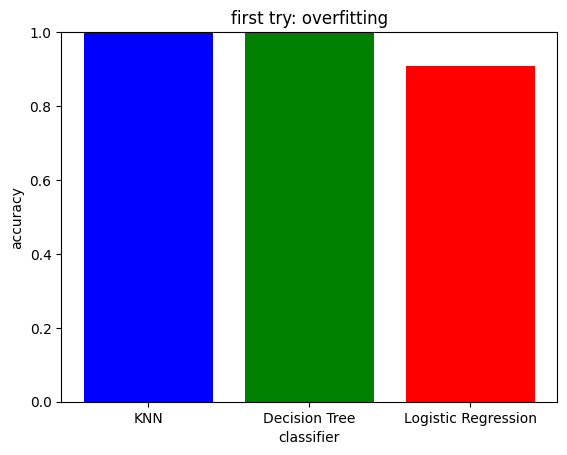

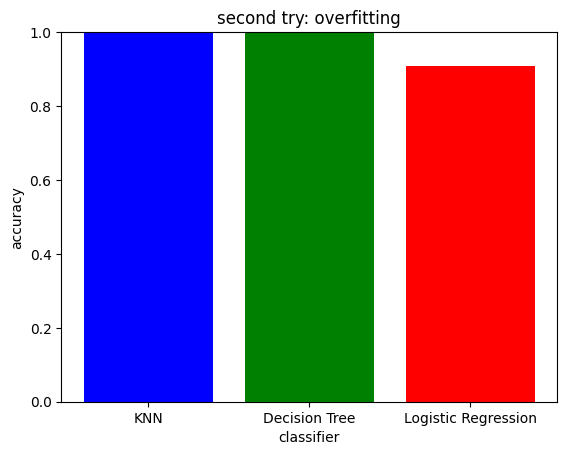

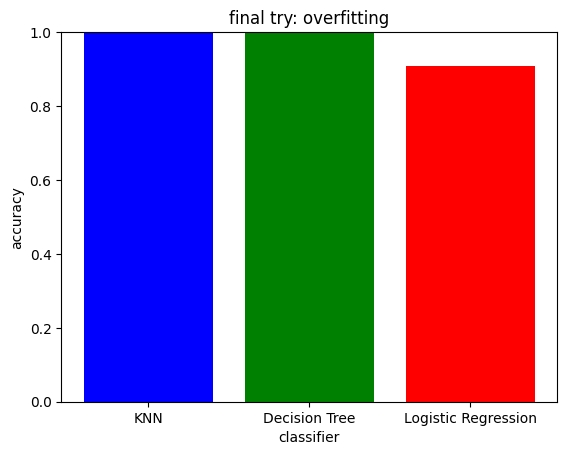

결론: 결정트리의 정확도는 과적합 되어있다
=>새로운 분류기인 support vector machine사용


In [54]:
# 모델 학습
knn_classifier.fit(X_train, y_train)
tree_classifier.fit(X_train, y_train)
logistic_classifier.fit(X_train, y_train)

# 예측
knn_predictions_validation = knn_classifier.predict(X_validation)
tree_predictions_validation = tree_classifier.predict(X_validation)
logistic_predictions_validation = logistic_classifier.predict(X_validation)

# 정확도 계산
accuracy_knn = accuracy_score(y_validation, knn_predictions_validation)
accuracy_tree = accuracy_score(y_validation, tree_predictions_validation)
accuracy_logistic = accuracy_score(y_validation, logistic_predictions_validation)

# 시각화1(결정트리과적합)
classifiers = ['KNN', 'Decision Tree', 'Logistic Regression']
accuracies = [accuracy_knn, accuracy_tree, accuracy_logistic]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('classifier')
plt.ylabel('accuracy')
plt.title('first try: overfitting')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
plt.show()

#과적합이 있는 결정트리만 다시 학습 후 시도
tree_classifier = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_classifier.fit(X_train, y_train)
tree_predictions_validation = tree_classifier.predict(X_validation)
accuracy_tree = accuracy_score(y_validation, tree_predictions_validation)

# 시각화2(결정트리 과적합)
classifiers = ['KNN', 'Decision Tree', 'Logistic Regression']
accuracies = [accuracy_knn, accuracy_tree, accuracy_logistic]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('classifier')
plt.ylabel('accuracy')
plt.title('second try: overfitting')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
plt.show()

#과적합이 있는 결정트리만 다시 학습 후 시도
tree_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_classifier.fit(X_train, y_train)
tree_predictions_validation = tree_classifier.predict(X_validation)
accuracy_tree = accuracy_score(y_validation, tree_predictions_validation)

# 시각화3(결정트리 과적합)
classifiers = ['KNN', 'Decision Tree', 'Logistic Regression']
accuracies= [accuracy_knn, accuracy_tree, accuracy_logistic]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('classifier')
plt.ylabel('accuracy')
plt.title('final try: overfitting')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
plt.show()

print("결론: 결정트리의 정확도는 과적합 되어있다\n=>새로운 분류기인 support vector machine사용")

결정트리의 과적합을 개선하기 힘들것이라 판단

=>새로운 분류기인 support vector machine사용

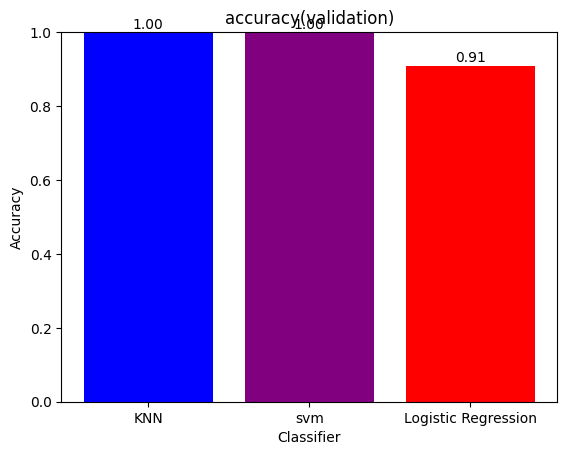

In [55]:
from sklearn.svm import SVC

# Support Vector Machine 모델
svm_model = SVC(random_state=42,probability=True)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_validation)
accuracy_svm = accuracy_score(y_validation, svm_predictions)

# 갱신된 accuracies 리스트
classifiers = ['KNN', 'svm', 'Logistic Regression']
accuracies = [accuracy_knn, accuracy_svm, accuracy_logistic]

# 막대 그래프로 시각화
plt.bar(classifiers, accuracies, color=['blue', 'purple', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('accuracy(validation)')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy+0.01 , f'{accuracy:.2f}', ha='center')
plt.show()


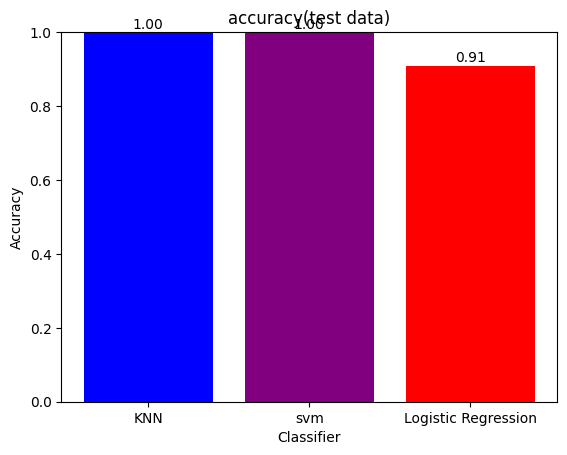

In [56]:
# 예측
knn_predictions_test = knn_classifier.predict(X_test)
svm_predictions_test = svm_model.predict(X_test)
logistic_predictions_test = logistic_classifier.predict(X_test)

# 정확도 계산
accuracy_knn = accuracy_score(y_test, knn_predictions_test)
accuracy_svc = accuracy_score(y_test, svm_predictions_test)
accuracy_logistic = accuracy_score(y_test, logistic_predictions_test)

# 막대 그래프로 시각화
plt.bar(classifiers, accuracies, color=['blue', 'purple', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('accuracy(test data)')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')
plt.show()


In [57]:
# 각 분류기에 대한 MSE 계산
mse_knn = mean_squared_error(y_test, knn_predictions_test)
mse_svm = mean_squared_error(y_test, svm_predictions_test)
mse_logistic = mean_squared_error(y_test, logistic_predictions_test)

import pandas as pd

# df만들기
mse_data = {
    'Classifier': ['KNN', 'SVM', 'Logistic Regression'],
    'MSE': [mse_knn, mse_svm, mse_logistic]
}
mse_df = pd.DataFrame(mse_data)

# Styling function to highlight the minimum MSE value
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

# Apply styling to the MSE DataFrame
styled_mse_df = mse_df.style.apply(highlight_min, subset=['MSE'])

# Display the styled DataFrame
print("Mean Squared Errors:")
styled_mse_df



Mean Squared Errors:


,Classifier,MSE
0,KNN,0.045455
1,SVM,0.136364
2,Logistic Regression,0.136364


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 정밀도 계산
precision_knn = precision_score(y_test, knn_predictions_test)
precision_svm = precision_score(y_test, svm_predictions_test)
precision_logistic = precision_score(y_test, logistic_predictions_test)

# 재현율 계산
recall_knn = recall_score(y_test, knn_predictions_test)
recall_svm = recall_score(y_test, svm_predictions_test)
recall_logistic = recall_score(y_test, logistic_predictions_test)

# F1 스코어 계산
f1_knn = f1_score(y_test, knn_predictions_test)
f1_svm = f1_score(y_test, svm_predictions_test)
f1_logistic = f1_score(y_test, logistic_predictions_test)

#df로 출력
metrics_data = {
    'Classifier': ['KNN', 'SVM', 'Logistic Regression'],
    'Precision': [precision_knn, precision_svm, precision_logistic],
    'Recall': [recall_knn, recall_svm, recall_logistic],
    'F1 Score': [f1_knn, f1_svm, f1_logistic]
}
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

            Classifier  Precision  Recall  F1 Score
0                  KNN   0.928571     1.0  0.962963
1                  SVM   0.812500     1.0  0.896552
2  Logistic Regression   0.812500     1.0  0.896552


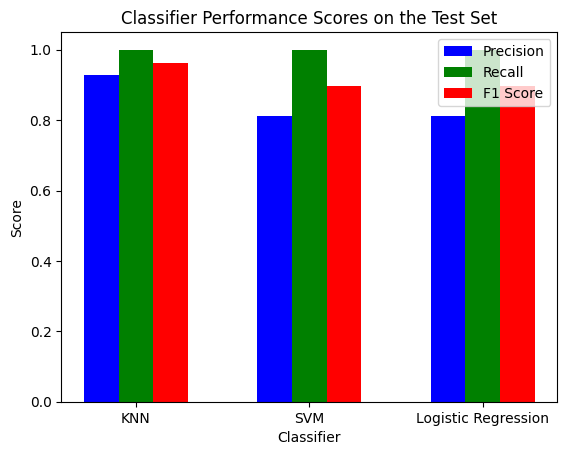

In [59]:
#시각화
import matplotlib.pyplot as plt

# 분류기 이름
classifiers = ['KNN', 'SVM', 'Logistic Regression']

# 각 분류기에 대한 정밀도, 재현율, F1 스코어 값 리스트
precision_scores = [precision_knn, precision_svm, precision_logistic]
recall_scores = [recall_knn, recall_svm, recall_logistic]
f1_scores = [f1_knn, f1_svm, f1_logistic]

# 그래프 설정
bar_width = 0.2
index = range(len(classifiers))

# 정밀도, 재현율, F1 스코어 막대 그래프 그리기
plt.bar(index, precision_scores, width=bar_width, label='Precision', color='blue')
plt.bar([i + bar_width for i in index], recall_scores, width=bar_width, label='Recall', color='green')
plt.bar([i + 2 * bar_width for i in index], f1_scores, width=bar_width, label='F1 Score', color='red')

# X 축 설정
plt.xlabel('Classifier')
plt.xticks([i + bar_width for i in index], classifiers)

# Y 축 설정
plt.ylabel('Score')
plt.title('Classifier Performance Scores on the Test Set')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()


knn은 높은 정확도를 가지되 비교적 낮은 재현율을 가진다

svm의 경우에는 knn과 반대의 양상을 가진다. 높은 재현율을 가지고 있으나 비교적 낮은 재현율을 가지고 있으며 로지스틱도 마찬가지 이다.

서로 상보적으로 재현율과 정확도를 채워줌으로 적합한 조합이라고 판단함.
 soft voting의 경우 상당히 높은 분류 성능 지표를 가진다.(hard voting도 마찬가지이다)

In [60]:
#나이브 베이즈 (Naive Bayes):
#특징: 베이즈 이론을 기반으로 한 확률적 분류기.
#사용 방법: 텍스트 분류, 스팸 필터링 등에 적합하며, 간단한 가정에 기반하여 빠르게 학습 가능.


In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score

# 나이브 베이즈 분류기 생성
naive_bayes_classifier = MultinomialNB()

# 훈련 데이터로 모델 훈련
naive_bayes_classifier.fit(X_train, y_train)

# 검증 데이터에 대한 예측 및 성능 평가
naive_bayes_predictions_validation = naive_bayes_classifier.predict(X_validation)
accuracy_naive_bayes_validation = accuracy_score(y_validation, naive_bayes_predictions_validation)

# 테스트 데이터에 대한 예측 및 성능 평가
naive_bayes_predictions_test = naive_bayes_classifier.predict(X_test)
accuracy_naive_bayes_test = accuracy_score(y_test, naive_bayes_predictions_test)
mse_naive_bayes = mean_squared_error(y_test, naive_bayes_predictions_test)
precision_naive_bayes = precision_score(y_test, naive_bayes_predictions_test)
recall_naive_bayes = recall_score(y_test, naive_bayes_predictions_test)
f1_naive_bayes = f1_score(y_test, naive_bayes_predictions_test)

# 성능 지표 출력
print("Validation Accuracy (Naive Bayes):", accuracy_naive_bayes_validation)
print("Test Accuracy (Naive Bayes):", accuracy_naive_bayes_test)
print("Mean Squared Error (Naive Bayes):", mse_naive_bayes)
print("Precision (Naive Bayes):", precision_naive_bayes)
print("Recall (Naive Bayes):", recall_naive_bayes)
print("F1 Score (Naive Bayes):", f1_naive_bayes)


Validation Accuracy (Naive Bayes): 0.6363636363636364
Test Accuracy (Naive Bayes): 0.5909090909090909
Mean Squared Error (Naive Bayes): 0.4090909090909091
Precision (Naive Bayes): 0.5909090909090909
Recall (Naive Bayes): 1.0
F1 Score (Naive Bayes): 0.7428571428571429


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting 분류기 생성
gradient_boosting_classifier = GradientBoostingClassifier()

# 훈련 데이터로 모델 훈련
gradient_boosting_classifier.fit(X_train, y_train)

# 검증 데이터에 대한 예측 및 성능 평가
gradient_boosting_predictions_validation = gradient_boosting_classifier.predict(X_validation)

# 테스트 데이터에 대한 예측 및 성능 평가
gradient_boosting_predictions_test = gradient_boosting_classifier.predict(X_test)

# 성능 지표 출력
print("Validation Accuracy (Gradient Boosting):", accuracy_score(y_validation, gradient_boosting_predictions_validation))
print("Test Accuracy (Gradient Boosting):", accuracy_score(y_test, gradient_boosting_predictions_test))

Validation Accuracy (Gradient Boosting): 1.0
Test Accuracy (Gradient Boosting): 1.0


# 5.softvoting(with 3different classifier)

**softvoting**(classifier:logistic+knn+desicion tree)

**분류기:**

 KNN 분류기

knn_classifier = KNeighborsClassifier(n_neighbors=3)

로지스틱 회귀 분류기

logistic_classifier = LogisticRegression()

SVM

svm_model = SVC(random_state=42)

In [63]:
# Voting Classifier1:soft
voting_classifier1 = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),       # KNeighborsClassifier
        ('svm', svm_model),      # DecisionTreeClassifier
        ('logistic',logistic_classifier )   # LogisticRegression
    ],
    voting='soft',  # Soft Voting 설정
    weights=[1, 1, 1]  # 각 분류기에 가중치 부여
)
# Fit the VotingClassifier
voting_classifier1.fit(X_train, y_train)

# 각 분류기의 예측 확률
knn_predictions_proba = knn_classifier.predict_proba(X_test)
svm_predictions_proba = svm_model.predict_proba(X_test)
logistic_predictions_proba = logistic_classifier.predict_proba(X_test)

# Soft Voting의 결과를 가져옵니다.
soft_voting_predictions_proba = voting_classifier1.predict_proba(X_test)

In [64]:

#각 분류기의 예측 확률을 데이터프레임으로 변환
knn_proba_df = pd.DataFrame(knn_predictions_proba, columns=['KNeighborsClassifier_0', 'KNeighborsClassifier_1'])
svm_proba_df = pd.DataFrame(svm_predictions_proba, columns=['SupportVectorMachine_0', 'SupportVectorMachine_1'])
logistic_proba_df = pd.DataFrame(logistic_predictions_proba, columns=['LogisticRegression_0', 'LogisticRegression_1'])
voting_proba_df = pd.DataFrame(soft_voting_predictions_proba, columns=['SoftVotingClassifier_0', 'SoftVotingClassifier_1'])

# 예측 확률 데이터프레임을 수평으로 결합
combined_proba_df = pd.concat([knn_proba_df, svm_proba_df, logistic_proba_df, voting_proba_df], axis=1)

# 결과 출력
display(combined_proba_df)


,KNeighborsClassifier_0,KNeighborsClassifier_1,SupportVectorMachine_0,SupportVectorMachine_1,LogisticRegression_0,LogisticRegression_1,SoftVotingClassifier_0,SoftVotingClassifier_1
0,0.000000,1.000000,1.577427e-07,1.000000,0.333484,0.666516,0.111161,0.888839
1,0.000000,1.000000,8.681676e-07,0.999999,0.303749,0.696251,0.101250,0.898750
2,0.000000,1.000000,2.269681e-07,1.000000,0.346831,0.653169,0.115610,0.884390
3,1.000000,0.000000,9.999458e-01,0.000054,0.527499,0.472501,0.842482,0.157518
4,0.000000,1.000000,7.999747e-06,0.999992,0.375454,0.624546,0.125154,0.874846
5,0.000000,1.000000,5.557981e-07,0.999999,0.308362,0.691638,0.102788,0.897212
6,0.333333,0.666667,5.888559e-01,0.411144,0.426576,0.573424,0.449588,0.550412
7,0.000000,1.000000,2.637665e-07,1.000000,0.318039,0.681961,0.106013,0.893987
8,1.000000,0.000000,9.998253e-01,0.000175,0.577826,0.422174,0.859217,0.140783
9,1.000000,0.000000,9.963620e-01,0.003638,0.651510,0.348490,0.882624,0.117376


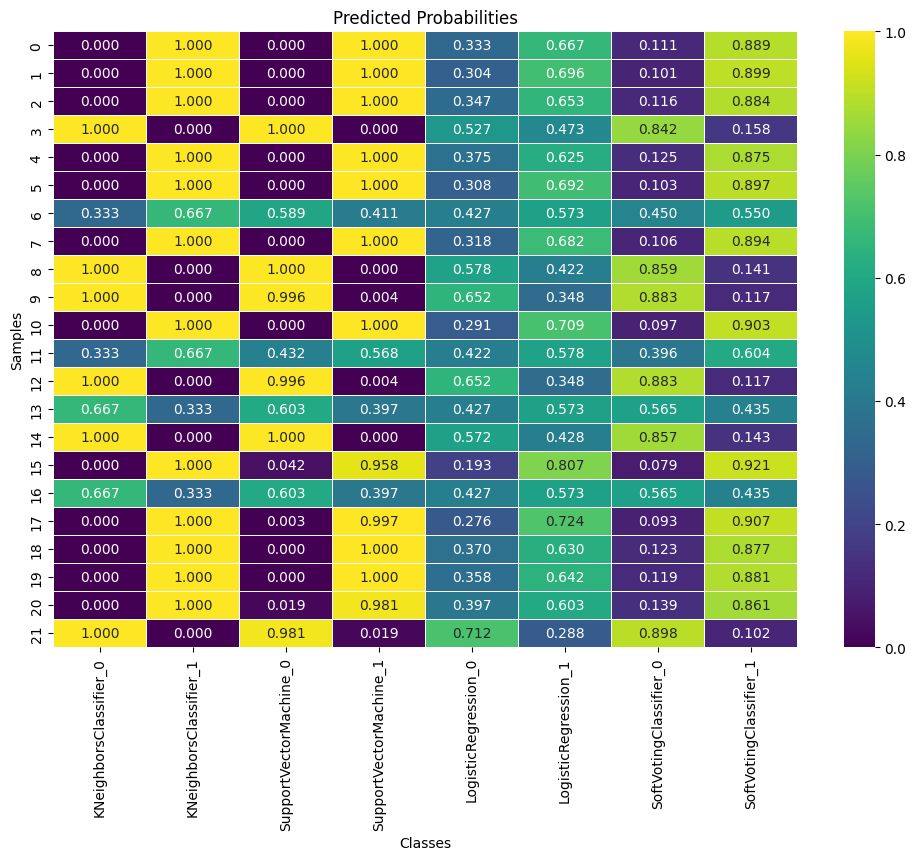

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plotting the heatmap
sns.heatmap(combined_proba_df, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Samples')
plt.title('Predicted Probabilities')

# Show the plot
plt.show()

결론


knn_classifier = KNeighborsClassifier(n_neighbors=3)



logistic_classifier = LogisticRegression()

SVM

svm_model = SVC(random_state=42)

(1)KNN 분류기
0또는 1이(true&false) 될 확률을 1.0 또는 0으로 판단 0과 1(true&false)을 예측하는 확률이 매우 극단적이라 판단

(2)SVM(support vector machine)
knn과 유사한 극단적 확률 예측값을 가짐. 몇몇개의 데이터에 한해서 균형된 예측값을 가짐

(3)로지스틱 회귀 분류기
위의 2가지의 분류기 보다 균형된 확률 예측값을 가짐

(4)soft voting
로지스틱의 대부분의 데이터가 0.5에서 많이 벗어나지 않는 확률 값을 가지는 한계를 극복함


#etc: 시각자료(히트맵, 그래프),mse 등,성능평가

In [66]:
#anntation(plotly)

import plotly.graph_objects as go

def plot_probabilities_plotly(probabilities, classifier_name):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=list(range(len(probabilities))),
                             y=probabilities[:, 1],
                             mode='lines+markers',
                             name=f'{classifier_name} - Class 1 Probability'))

    fig.update_layout(title=f'{classifier_name} Predicted Probabilities',
                      xaxis_title='test Index',
                      yaxis_title='Probability')

    fig.show()

# 각 분류기의 예측 확률을 plotly로 시각화
plot_probabilities_plotly(knn_predictions_proba, 'KNeighborsClassifier')
plot_probabilities_plotly(svm_predictions_proba, 'SupportVectorClassifier')
plot_probabilities_plotly(logistic_predictions_proba, 'LogisticRegression')
plot_probabilities_plotly(soft_voting_predictions_proba, 'SoftVotingClassifier')


In [67]:
import plotly.express as px
import plotly.graph_objects as go

# 각 분류기의 예측 확률을 데이터프레임으로 변환
proba_df = pd.DataFrame({
    'KNN': knn_predictions_proba[:, 1],
    'SVM': svm_predictions_proba[:, 1],
    'Logistic': logistic_predictions_proba[:, 1],
    'SoftVoting': soft_voting_predictions_proba[:, 1]
})

# Heatmap
fig_heatmap = px.imshow(proba_df.T, labels=dict(color="Probability"), x=proba_df.index, y=proba_df.columns)
fig_heatmap.update_layout(title='Predicted Probabilities Heatmap')

# Scatter Plot
fig_scatter = px.scatter(proba_df, x='KNN', y='SVM', color='Logistic', size='SoftVoting',
                         labels={'KNN': 'KNN Probability', 'SVM': 'SVM Probability', 'Logistic': 'Logistic Probability', 'SoftVoting': 'SoftVoting Probability'},
                         title='Scatter Plot of Predicted Probabilities')

# Line Plot
fig_line = px.line(proba_df, labels={'index': 'Test Index', 'value': 'Probability'},
                   title='Line Plot of Predicted Probabilities')


# Show the plots
fig_heatmap.show()
fig_scatter.show()
fig_line.show()


In [68]:
from sklearn.metrics import mean_squared_error

# Soft Voting의 예측 확률을 가져옵니다.
soft_voting_predictions_proba = voting_classifier1.predict_proba(X_test)

# MSE 계산
soft_voting_mse = mean_squared_error(y_test, soft_voting_predictions_proba[:, 1])
print(f'Soft Voting의 MSE: {soft_voting_mse}')


Soft Voting의 MSE: 0.04939689106929945


# 6.hardvoting(with 3different classifier)

**hard voting**(classifier:logistic+knn+svm)

In [69]:
# Voting Classifier2:hard
voting_classifier2 = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),       # KNeighborsClassifier
        ('svm', svm_model),      # supportVector Machine
        ('logistic',logistic_classifier )   # LogisticRegression
    ],
    voting='hard',  # Hard Voting 설정
    weights=[1, 1, 1]  # 각 분류기에 가중치 부여
)
# Fit the VotingClassifier
voting_classifier2.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('logistic', LogisticRegression())],
                 weights=[1, 1, 1])

In [70]:
key_list = df_keyword['중요도'].tolist()
key_list = np.array(key_list).reshape(-1, 1)

len(key_list)

220

In [71]:
import re
from collections import defaultdict

# 한글 추출을 위한 정규표현식 패턴
hangul_pattern = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣]')

# index를 유지하기 위해 defaultdict 사용
fasttext_input = defaultdict(list)

# bert_keyword에서 index를 유지하며 작은 따옴표 안의 한글만 추출하여 fasttext_input에 추가
for i, keywords in enumerate(bert_keyword):
    for keyword, _ in keywords:
        # 작은 따옴표 안의 한글만 추출하여 fasttext_input에 추가
        hangul_keyword = hangul_pattern.sub('', keyword)
        fasttext_input[i].append(hangul_keyword)

# defaultdict를 일반 dictionary로 변환
fasttext_input = dict(fasttext_input)

# fasttext_input 확인
for index, keywords in fasttext_input.items():
    print(f"index {index}: {keywords}")


index 0: ['공고']
index 1: ['협회']
index 2: ['공고']
index 3: ['영어']
index 4: ['싱가포르']
index 5: ['수업']
index 6: ['학년도']
index 7: ['학년도']
index 8: ['국제']
index 9: ['학년도']
index 10: ['학년도']
index 11: ['싱가포르']
index 12: ['안내']
index 13: ['연구윤리']
index 14: ['학년도']
index 15: ['다문화']
index 16: ['대학']
index 17: ['영어']
index 18: ['글쓰기']
index 19: ['폭력']
index 20: ['디자인']
index 21: ['전기공사공제조합']
index 22: ['학생']
index 23: ['혁신']
index 24: ['채용']
index 25: ['학년도']
index 26: ['스토어']
index 27: ['학년도']
index 28: ['학년도']
index 29: ['애널리스트']
index 30: ['음악회']
index 31: ['글쓰기']
index 32: ['학년도']
index 33: ['인턴십']
index 34: ['소통']
index 35: ['협회']
index 36: ['공포']
index 37: ['온라인']
index 38: ['변리사']
index 39: ['혁신']
index 40: ['혁신']
index 41: ['아시아']
index 42: ['수강']
index 43: ['학습법']
index 44: ['안내']
index 45: ['학년도']
index 46: ['모집']
index 47: ['총장실']
index 48: ['안내']
index 49: ['안내']
index 50: ['연구윤리']
index 51: ['학기']
index 52: ['학년도']
index 53: ['클레지오']
index 54: ['채용']
index 55: ['학생']
index 56: ['학기']

In [72]:
from gensim.models.fasttext import FastText

# fasttext 입력 데이터 생성
sentences = []
for index, keywords in fasttext_input.items():
    sentence = ' '.join(keywords)
    sentences.append(sentence)

# fasttext 모델 학습
model = FastText(vector_size=100, window=5, min_count=1)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=10)

# fasttext 모델 활용 예시
# 단어 벡터 확인
word_vector = model.wv['공고']
print(word_vector)

# 유사한 단어 찾기
similar_words = model.wv.most_similar('공고')
print(similar_words)


[ 7.40454241e-04 -7.21253222e-03 -2.36267690e-03 -3.57214338e-03
 -3.07401031e-04  2.06362689e-03  3.66910617e-03  6.11744821e-03
 -3.60620324e-03 -3.58114601e-04 -7.55257905e-04 -1.07861729e-03
 -4.16631997e-03  3.60857067e-03  6.88171526e-03 -2.19409796e-03
 -2.19041202e-03  3.85954673e-03  4.22629388e-03 -3.78883933e-03
  4.68862389e-04 -5.22389496e-03 -1.53331319e-03  1.28127320e-03
  1.20359786e-04 -2.59647681e-03 -2.40136101e-03  1.97640504e-03
 -1.05319812e-03  3.91374109e-03  3.03153601e-03 -7.39387749e-03
  4.54166252e-03  4.80073178e-03  3.82990460e-03 -7.19825737e-04
 -2.92632985e-03 -2.76702293e-03  2.09964672e-03  1.09790603e-03
  7.25698471e-03 -1.04923046e-03 -3.64645733e-03 -1.90546724e-03
  7.02989101e-03  2.47460208e-04  2.58317147e-03 -2.43389164e-03
 -1.32441882e-03 -5.58120431e-03  7.21364794e-03  3.65937781e-03
 -4.67257429e-04 -7.28387851e-04 -1.25131535e-03 -5.53093525e-03
  3.24744289e-03 -3.76637932e-03 -1.26837927e-03 -6.35501323e-03
  5.09259477e-03 -1.38271

In [73]:
#Hard Voting Classifier 모델 학습
voting_classifier2.fit(X_train, y_train)

# 각 분류기의 예측을 가져옵니다.
knn_predictions = knn_classifier.predict(key_list)
svm_predictions = svm_model.predict(key_list)
logistic_predictions = logistic_classifier.predict(key_list)

# Hard Voting의 결과를 가져옵니다.
hard_voting_predictions = voting_classifier2.predict(key_list)

# 결과 출력
result_df_hard_voting = pd.DataFrame({
    'knn': knn_predictions,
    'svm': svm_predictions,
    'Logistic': logistic_predictions,
    'HardVoting': hard_voting_predictions
})
display(result_df_hard_voting)



,knn,svm,Logistic,HardVoting
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
215,1,1,1,1
216,1,1,1,1
217,1,1,1,1
218,1,1,1,1


# **Fasttext와 사용자 선택 4개 단어**

In [74]:
import pandas as pd

# 4개의 단어
target_words = ['공학', '공연', '여행', '역사']

# 표 초기화
similarity_table = pd.DataFrame(columns=target_words)

# 각 단어의 벡터와 220개 단어의 벡터 간 유사도 계산
for word in target_words:
    similarity_scores = []
    for index, keywords in fasttext_input.items():
        sentence = ' '.join(keywords)
        similarity = model.wv.similarity(word, sentence)
        similarity_scores.append(similarity)
    similarity_table[word] = similarity_scores

# 전치하여 행과 열을 바꾼 표 생성
transposed_table = similarity_table.transpose()

# 평균 행 추가
transposed_table.loc['평균'] = transposed_table.mean()

display(transposed_table)

# CSV 파일로 저장
file_path = '/content/drive/MyDrive/Colab Notebooks/fastT4words.csv'
transposed_table.to_csv(file_path, encoding='utf-8', index=True)


,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
공학,0.205768,0.102998,0.205768,0.077157,-0.133858,0.007201,0.005224,0.005224,0.122934,0.005224,...,0.114689,-0.053919,-0.167223,-0.104457,0.103384,-0.082038,-0.147670,-0.167223,-0.167223,0.029923
공연,0.051580,0.125375,0.051580,-0.055467,-0.070215,-0.001064,0.018979,0.018979,-0.211778,0.018979,...,0.112831,-0.268537,-0.047154,-0.086210,0.009751,0.009619,0.050975,-0.047154,-0.047154,0.137166
여행,-0.020865,-0.124458,-0.020865,-0.016177,-0.008820,-0.110134,0.103689,0.103689,-0.132556,0.103689,...,-0.052305,0.101436,-0.038019,0.039893,0.060229,0.087719,0.015435,-0.038019,-0.038019,-0.106447
역사,0.001058,0.002924,0.001058,-0.010737,0.156090,0.021628,-0.087177,-0.087177,0.227936,-0.087177,...,-0.134031,-0.006973,0.044244,-0.025853,0.057838,0.122468,-0.000232,0.044244,0.044244,-0.073106
평균,0.059386,0.026710,0.059386,-0.001306,-0.014201,-0.020592,0.010179,0.010179,0.001634,0.010179,...,0.010296,-0.056998,-0.052038,-0.044157,0.057801,0.034442,-0.020373,-0.052038,-0.052038,-0.003116


In [75]:
df_similarity1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fastT4words.csv')
df_similarity1

avg_similarity_ft=df_similarity1.iloc[4]
print(len(avg_similarity_ft.values))
avg_similarity1=list(avg_similarity_ft.values)
avg_similarity1 = avg_similarity1[1:]
avg_similarity1

221


[0.059385512,
 0.026709717,
 0.059385512,
 -0.0013060118,
 -0.014200877,
 -0.020592252,
 0.010178624,
 0.010178624,
 0.0016338676,
 0.010178624,
 0.010178624,
 -0.014200877,
 -0.08898029,
 -0.09659657,
 0.010178624,
 -0.008416578,
 -0.014731966,
 -0.0013060118,
 -0.04459239,
 -0.0068117063,
 -0.034391873,
 0.027724009,
 -0.021704271,
 0.061194457,
 -0.020324739,
 0.010178624,
 0.0071212575,
 0.010178624,
 0.010178624,
 0.063173614,
 -0.088178545,
 -0.04459239,
 0.010178624,
 -0.054450627,
 0.04386582,
 0.026709717,
 -0.03819696,
 0.049070254,
 0.012230551,
 0.061194457,
 0.061194457,
 0.059828043,
 -0.05875317,
 -0.044156842,
 -0.08898029,
 0.010178624,
 -0.044851657,
 -0.12213928,
 -0.08898029,
 -0.08898029,
 -0.09659657,
 -0.052037947,
 0.010178624,
 0.021167766,
 -0.020324739,
 -0.021704271,
 -0.052037947,
 -0.020324739,
 -0.0068117063,
 0.0016338676,
 -0.052037947,
 -0.08898029,
 -0.067407064,
 0.010178624,
 -0.088178545,
 0.010178624,
 -0.014731966,
 -0.08898029,
 0.05080366,
 -0.

In [76]:
result_df_hard_voting["cosine_similarity_avg"] = avg_similarity1
Hard_cosine = list(result_df_hard_voting['HardVoting'] * result_df_hard_voting['cosine_similarity_avg'])
result_df_hard_voting["Hard*cosine"] = Hard_cosine
display(result_df_hard_voting)

,knn,svm,Logistic,HardVoting,cosine_similarity_avg,Hard*cosine
0,1,1,1,1,0.059386,0.059386
1,1,1,1,1,0.026710,0.026710
2,1,1,1,1,0.059386,0.059386
3,0,0,0,0,-0.001306,-0.000000
4,0,0,1,0,-0.014201,-0.000000
...,...,...,...,...,...,...
215,1,1,1,1,0.034442,0.034442
216,1,1,1,1,-0.020373,-0.020373
217,1,1,1,1,-0.052038,-0.052038
218,1,1,1,1,-0.052038,-0.052038


In [77]:
df_filtered = result_df_hard_voting[result_df_hard_voting["Hard*cosine"] != 0]
df_filtered = df_filtered.sort_values(by="Hard*cosine", ascending=False)

keys_list = df_filtered.index.tolist()
values_list = df_filtered["Hard*cosine"].tolist()
display(df_filtered)

,knn,svm,Logistic,HardVoting,cosine_similarity_avg,Hard*cosine
119,1,1,1,1,0.127496,0.127496
161,1,1,1,1,0.127496,0.127496
201,1,1,1,1,0.082412,0.082412
0,1,1,1,1,0.059386,0.059386
2,1,1,1,1,0.059386,0.059386
...,...,...,...,...,...,...
160,1,1,1,1,-0.088980,-0.088980
61,1,1,1,1,-0.088980,-0.088980
172,1,1,1,1,-0.088980,-0.088980
13,1,1,1,1,-0.096597,-0.096597


In [78]:
import pandas as pd

# Hard*cosine이 0이 아닌 행만 필터링하여 df_filtered에 저장
df_filtered = result_df_hard_voting[result_df_hard_voting["Hard*cosine"] != 0]
display(df_filtered)

# df_filtered에서 "Hard*cosine" 열만 선택하여 df_cosine에 저장
df_cosine = df_filtered["Hard*cosine"]
df_cosine_dsc = df_cosine.sort_values(ascending=False)
display(df_cosine_dsc)

# df_cosine_dsc의 인덱스와 값을 리스트로 저장하여 cosine_data 데이터프레임 생성
keys_list = list(df_cosine_dsc.index)
values_list = list(df_cosine_dsc.values)
cosine_data = pd.DataFrame({"번호": keys_list, "최종값": values_list})
cosine_data.set_index('번호', inplace=True)
cosine_data

# X와 cosine_data를 번호를 기준으로 병합하여 merged_df 생성 후 최종값을 기준으로 내림차순 정렬
merged_df = pd.merge(X, cosine_data, left_index=True, right_index=True)
merged_df = merged_df.sort_values(by="최종값", ascending=False)
merged_df

# 결과를 Excel 파일로 저장
file_path = "결과파일.xlsx"
merged_df.to_excel(file_path, index=True)

,knn,svm,Logistic,HardVoting,cosine_similarity_avg,Hard*cosine
0,1,1,1,1,0.059386,0.059386
1,1,1,1,1,0.026710,0.026710
2,1,1,1,1,0.059386,0.059386
6,1,1,1,1,0.010179,0.010179
7,1,1,1,1,0.010179,0.010179
...,...,...,...,...,...,...
214,1,1,1,1,0.057801,0.057801
215,1,1,1,1,0.034442,0.034442
216,1,1,1,1,-0.020373,-0.020373
217,1,1,1,1,-0.052038,-0.052038


119    0.127496
161    0.127496
201    0.082412
0      0.059386
2      0.059386
         ...   
160   -0.088980
61    -0.088980
172   -0.088980
13    -0.096597
47    -0.122139
Name: Hard*cosine, Length: 133, dtype: float64

#etc: 시각자료(히트맵, 그래프),mse 등

In [41]:
import plotly.graph_objects as go

def plot_predictions_plotly(predictions, classifier_name):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=list(range(len(predictions))),
                             y=predictions,
                             mode='lines+markers',
                             name=f'{classifier_name} Predictions'))

    fig.update_layout(title=f'{classifier_name} Predictions',
                      xaxis_title='test Index',
                      yaxis_title='Predictions')

    fig.show()

# 각 분류기의 예측을 plotly로 시각화
plot_predictions_plotly(knn_predictions, 'KNeighborsClassifier')
plot_predictions_plotly(svm_predictions, 'SupportVectorMachine')
plot_predictions_plotly(logistic_predictions, 'LogisticRegression')
plot_predictions_plotly(hard_voting_predictions, 'HardVotingClassifier')


In [43]:
'''
#딱히 별의미없으나 일단 출력해봄

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for predictions
plt.figure(figsize=(12, 8))
sns.heatmap(result_df_hard_voting.T, cmap='coolwarm', annot=True, fmt='d', cbar=False)
plt.title('Predictions Heatmap')
plt.xlabel('Sample Index')
plt.ylabel('Classifier')
plt.show()
'''

"\n#딱히 별의미없으나 일단 출력해봄\n\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Create a heatmap for predictions\nplt.figure(figsize=(12, 8))\nsns.heatmap(result_df_hard_voting.T, cmap='coolwarm', annot=True, fmt='d', cbar=False)\nplt.title('Predictions Heatmap')\nplt.xlabel('Sample Index')\nplt.ylabel('Classifier')\nplt.show()\n"

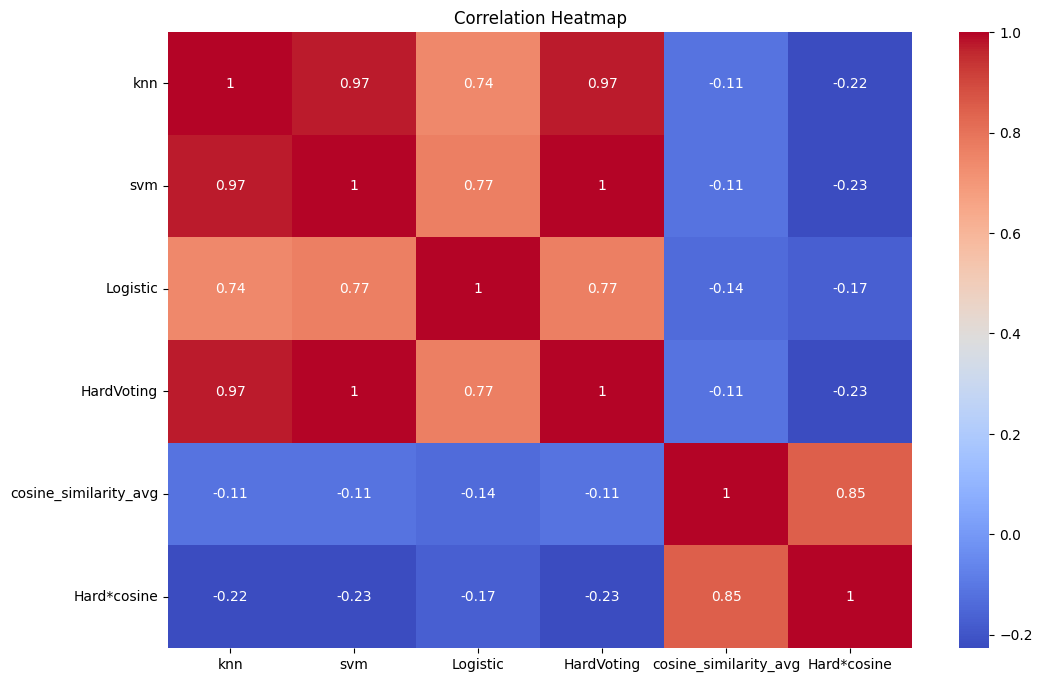

In [44]:
# Create a correlation_heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(result_df_hard_voting.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
import plotly.express as px

# Scatter Plot
fig_scatter = px.scatter(result_df_hard_voting, x='knn', y='svm', color='Logistic', size='HardVoting',
                         labels={'knn': 'KNN Probability', 'svm': 'SVM Probability', 'Logistic': 'Logistic Probability', 'HardVoting': 'HardVoting Probability'},
                         title='Scatter Plot of Predicted Probabilities')

# Show the plot
fig_scatter.show()

'''
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(result_df_hard_voting['knn'], result_df_hard_voting['svm'],result_df_hard_voting['Logistic'])
plt.title('Scatter Plot')
plt.xlabel('knn')
plt.ylabel('svm')
plt.show()
'''



"\n# Scatter Plot\nplt.figure(figsize=(10, 6))\nplt.scatter(result_df_hard_voting['knn'], result_df_hard_voting['svm'],result_df_hard_voting['Logistic'])\nplt.title('Scatter Plot')\nplt.xlabel('knn')\nplt.ylabel('svm')\nplt.show()\n"

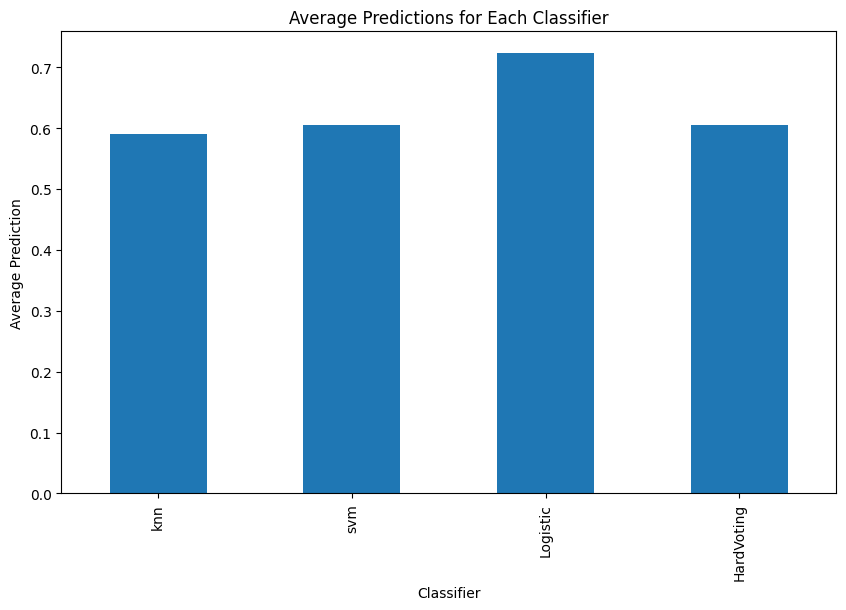

In [46]:
plt.figure(figsize=(10, 6))
result_df_hard_voting[['knn', 'svm', 'Logistic', 'HardVoting']].mean().plot(kind='bar')
plt.title('Average Predictions for Each Classifier')
plt.xlabel('Classifier')
plt.ylabel('Average Prediction')
plt.show()

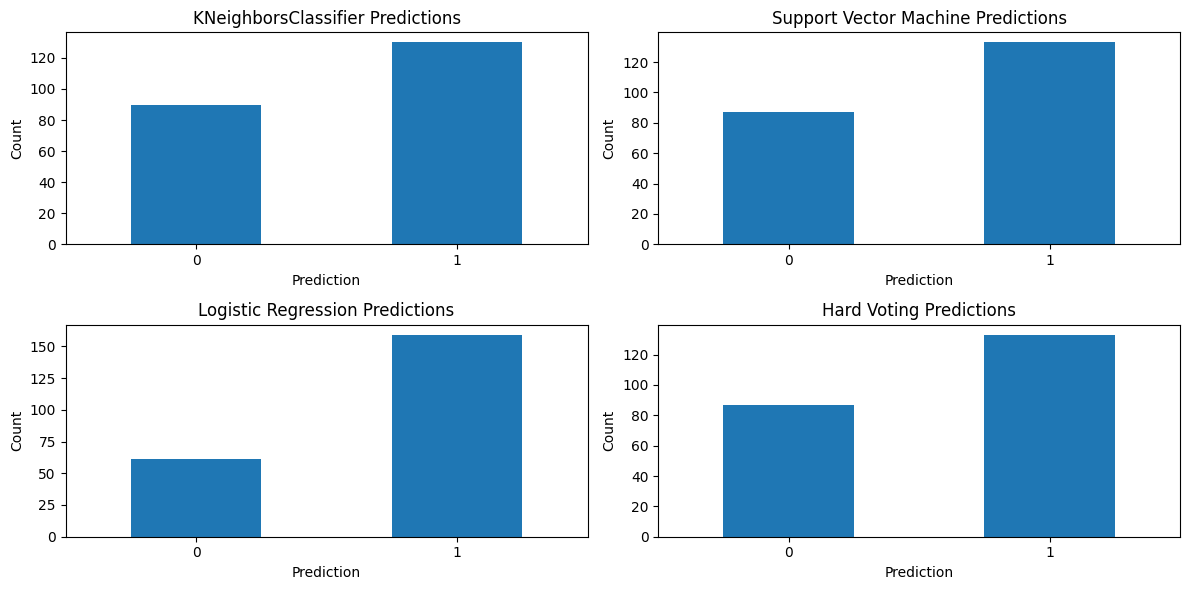

In [47]:
import matplotlib.pyplot as plt

# Individual Bar Plots for Each Classifier
plt.figure(figsize=(12, 6))

# KNeighborsClassifier
plt.subplot(221)
result_df_hard_voting['knn'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('KNeighborsClassifier Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Support Vector Machine
plt.subplot(222)
result_df_hard_voting['svm'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Support Vector Machine Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Logistic Regression
plt.subplot(223)
result_df_hard_voting['Logistic'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Logistic Regression Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Hard Voting
plt.subplot(224)
result_df_hard_voting['HardVoting'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Hard Voting Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# classification_evaluation&shap of hard,soft

Soft Voting 성능:
정확도: 0.9545
정밀도: 0.9286
재현율: 1.0000
F1 점수: 0.9630

Hard Voting 성능:
정확도: 0.8636
정밀도: 0.8125
재현율: 1.0000
F1 점수: 0.8966


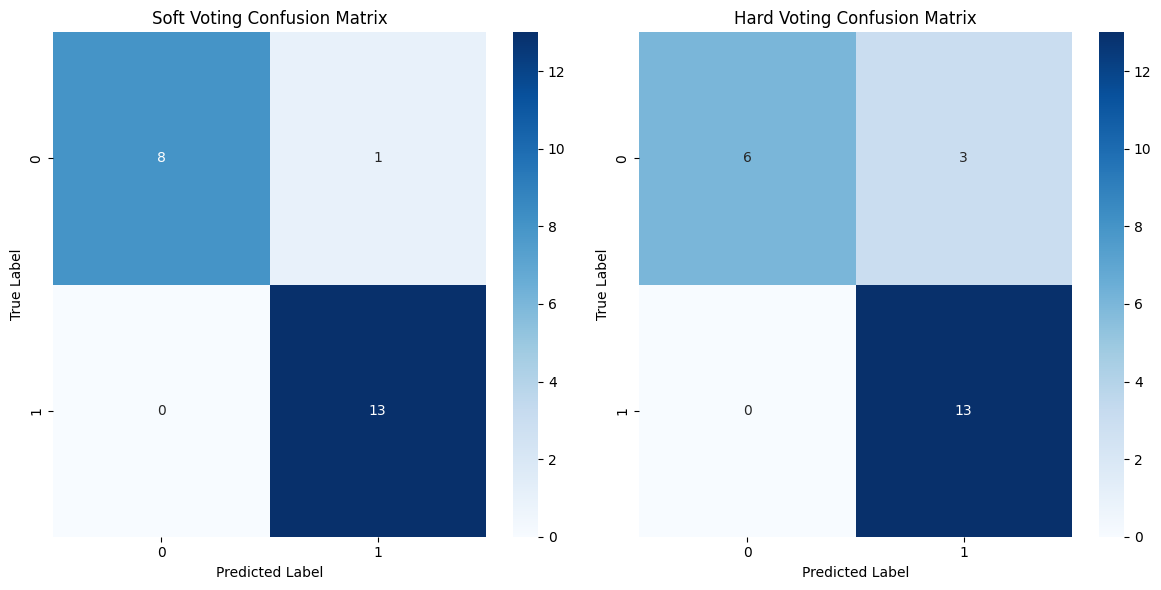

In [48]:
# 추가 import
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your models
voting_classifier1.fit(X_train, y_train)
voting_classifier2.fit(X_train, y_train)

# Make predictions
soft_voting_predictions = voting_classifier1.predict(X_test)
hard_voting_predictions = voting_classifier2.predict(X_test)

# Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Soft Voting의 성능 평가
soft_voting_accuracy = accuracy_score(y_test, soft_voting_predictions)
soft_voting_precision = precision_score(y_test, soft_voting_predictions)
soft_voting_recall = recall_score(y_test, soft_voting_predictions)
soft_voting_f1 = f1_score(y_test, soft_voting_predictions)

# Hard Voting의 성능 평가
hard_voting_accuracy = accuracy_score(y_test, hard_voting_predictions)
hard_voting_precision = precision_score(y_test, hard_voting_predictions)
hard_voting_recall = recall_score(y_test, hard_voting_predictions)
hard_voting_f1 = f1_score(y_test, hard_voting_predictions)

# 결과 출력
print("Soft Voting 성능:")
print(f"정확도: {soft_voting_accuracy:.4f}")
print(f"정밀도: {soft_voting_precision:.4f}")
print(f"재현율: {soft_voting_recall:.4f}")
print(f"F1 점수: {soft_voting_f1:.4f}")

print("\nHard Voting 성능:")
print(f"정확도: {hard_voting_accuracy:.4f}")
print(f"정밀도: {hard_voting_precision:.4f}")
print(f"재현율: {hard_voting_recall:.4f}")
print(f"F1 점수: {hard_voting_f1:.4f}")

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Soft Voting Confusion Matrix
soft_voting_conf_matrix = confusion_matrix(y_test, soft_voting_predictions)
sns.heatmap(soft_voting_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Soft Voting Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Hard Voting Confusion Matrix
hard_voting_conf_matrix = confusion_matrix(y_test, hard_voting_predictions)
sns.heatmap(hard_voting_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Hard Voting Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


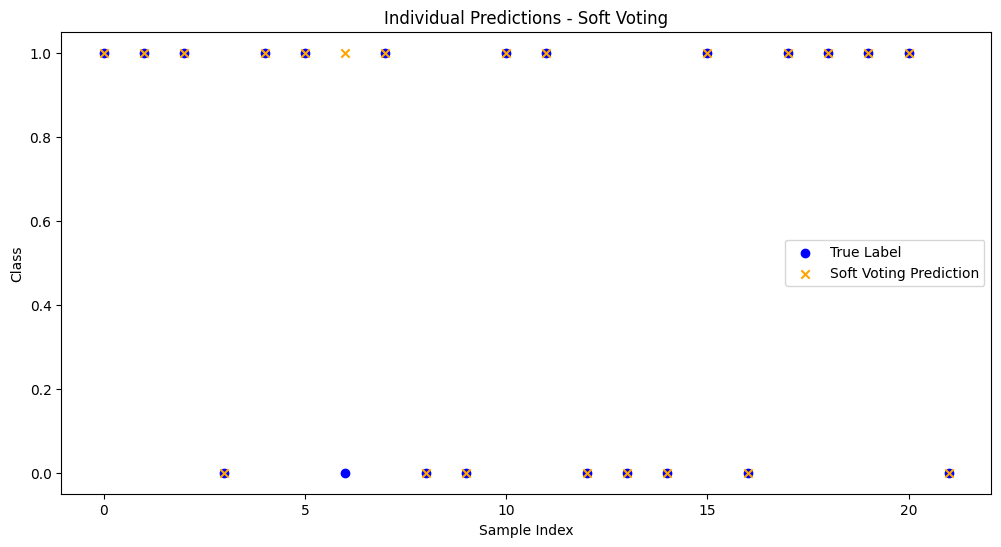

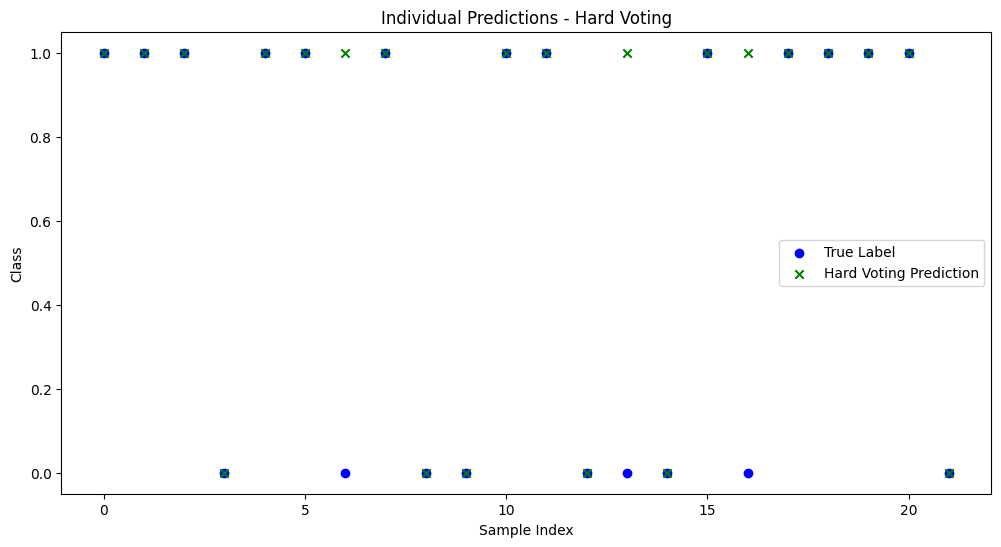

In [49]:

import matplotlib.pyplot as plt

# Create a DataFrame for visualization
df_visualize = pd.DataFrame({
    'True Label': y_test,
    'Soft Voting Prediction': soft_voting_predictions,
    'Hard Voting Prediction': hard_voting_predictions
})

# Scatter Plot for Soft Voting
plt.figure(figsize=(12, 6))
plt.scatter(df_visualize.index, df_visualize['True Label'], label='True Label', marker='o', color='blue')
plt.scatter(df_visualize.index, df_visualize['Soft Voting Prediction'], label='Soft Voting Prediction', marker='x', color='orange')
plt.title('Individual Predictions - Soft Voting')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

# Scatter Plot for Hard Voting
plt.figure(figsize=(12, 6))
plt.scatter(df_visualize.index, df_visualize['True Label'], label='True Label', marker='o', color='blue')
plt.scatter(df_visualize.index, df_visualize['Hard Voting Prediction'], label='Hard Voting Prediction', marker='x', color='green')
plt.title('Individual Predictions - Hard Voting')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()


분류 결과를 보면 Soft Voting과 Hard Voting 모두 높은 성능을 보여주고 있습니다. 정확도, 정밀도, 재현율, 그리고 F1 점수 모두에서 유사한 결과를 얻었습니다. 이는 두 분류기가 테스트 데이터에서 비슷한 예측 성능을 나타내고 있다는 것을 의미합니다.

높은 정확도 (0.9545): 테스트 세트에서 약 95.45%의 샘플에 대해 정확한 예측을 수행했습니다.

높은 정밀도 (0.9167): 양성 예측 중 약 91.67%가 실제로 양성이었습니다.

높은 재현율 (1.0000): 모든 실제 양성 사례를 100% 식별했습니다.

높은 F1 점수 (0.9565): 정밀도와 재현율의 균형을 나타내는 지표로, 0.9565의 값은 모델의 성능이 균형 잡혀있다는 것을 보여줍니다.

이러한 결과로 보아 Soft Voting과 Hard Voting은 모두 효과적으로 작동하며,어느 것을 선택해도 좋을 것으로 판단됩니다.

In [50]:
'''
import shap
import matplotlib.pyplot as plt

# Assuming you have already trained your models (knn_classifier, svm_model, logistic_classifier)
# Make sure your models have predict_proba method for soft voting
# If not, you might need to train soft voting with models that have predict_proba method

# Define individual models used in the VotingClassifier
knn_model = knn_classifier
svm_model = svm_model
logistic_model = logistic_classifier

# Define a function to make predictions using the individual models
def knn_predict(X):
    return knn_model.predict(X)

def svm_predict(X):
    return svm_model.predict(X)

def logistic_predict(X):
    return logistic_model.predict_proba(X)[:, 1]  # Use predict_proba for logistic model

# Define a SHAP explainer using KernelExplainer for each model
explainer_knn = shap.KernelExplainer(knn_predict, X_train)
explainer_svm = shap.KernelExplainer(svm_predict, X_train)
explainer_logistic = shap.KernelExplainer(logistic_predict, X_train)

# Calculate SHAP values for the test set for each model
shap_values_knn = explainer_knn.shap_values(X_test)
shap_values_svm = explainer_svm.shap_values(X_test)
shap_values_logistic = explainer_logistic.shap_values(X_test)

# Plot overall SHAP summary plot for each model
plt.figure(figsize=(15, 10))

# KNN model
plt.subplot(3, 1, 1)
shap.summary_plot(shap_values_knn, X_test, plot_type='bar', title='SHAP Summary Plot - KNN Model')

# SVM model
plt.subplot(3, 1, 2)
shap.summary_plot(shap_values_svm, X_test, plot_type='bar', title='SHAP Summary Plot - SVM Model')

# Logistic model
plt.subplot(3, 1, 3)
shap.summary_plot(shap_values_logistic, X_test, plot_type='bar', title='SHAP Summary Plot - Logistic Model')

plt.tight_layout()
plt.show()
'''

"\nimport shap\nimport matplotlib.pyplot as plt\n\n# Assuming you have already trained your models (knn_classifier, svm_model, logistic_classifier)\n# Make sure your models have predict_proba method for soft voting\n# If not, you might need to train soft voting with models that have predict_proba method\n\n# Define individual models used in the VotingClassifier\nknn_model = knn_classifier\nsvm_model = svm_model\nlogistic_model = logistic_classifier\n\n# Define a function to make predictions using the individual models\ndef knn_predict(X):\n    return knn_model.predict(X)\n\ndef svm_predict(X):\n    return svm_model.predict(X)\n\ndef logistic_predict(X):\n    return logistic_model.predict_proba(X)[:, 1]  # Use predict_proba for logistic model\n\n# Define a SHAP explainer using KernelExplainer for each model\nexplainer_knn = shap.KernelExplainer(knn_predict, X_train)\nexplainer_svm = shap.KernelExplainer(svm_predict, X_train)\nexplainer_logistic = shap.KernelExplainer(logistic_predict, X

In [ ]:
'''
import shap

# Assuming you have already trained your models (knn_classifier, svm_model, logistic_classifier)
# Make sure your models have predict_proba method for soft voting
# If not, you might need to train soft voting with models that have predict_proba method

# Define individual models used in the VotingClassifier
knn_model = knn_classifier
svm_model = svm_model
logistic_model = logistic_classifier

# Define a function to make predictions using the individual models
def voting_predict(X):
    knn_preds = knn_model.predict(X)
    svm_preds = svm_model.predict(X)
    logistic_preds = logistic_model.predict(X)
    # Adjust the combination method based on your VotingClassifier settings
    hard_voting_preds = np.array([1 if sum(p) > 1 else 0 for p in zip(knn_preds, svm_preds, logistic_preds)])
    return hard_voting_preds

# Define a SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(voting_predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for the combined model
plt.figure(figsize=(10, 15))
shap.summary_plot(shap_values, X_test, title='SHAP Summary Plot - Combined Model')

# Plot SHAP summary plot for the combined model with a larger figure size
'''

In [ ]:
'''
import shap
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your models (knn_classifier, svm_model, logistic_classifier)
# Make sure your models have predict_proba method for soft voting
# If not, you might need to train soft voting with models that have predict_proba method

# Define individual models used in the VotingClassifier
knn_model = knn_classifier
svm_model = svm_model
logistic_model = logistic_classifier

# Define a function to make predictions using the individual models
def knn_predict(X):
    return knn_model.predict(X)

def svm_predict(X):
    return svm_model.predict(X)

def logistic_predict(X):
    return logistic_model.predict(X)

# Define a SHAP explainer using KernelExplainer for each model
explainer_knn = shap.KernelExplainer(knn_predict, X_train)
explainer_svm = shap.KernelExplainer(svm_predict, X_train)
explainer_logistic = shap.KernelExplainer(logistic_predict, X_train)

# Calculate SHAP values for the test set for each model
shap_values_knn = explainer_knn.shap_values(X_test)
shap_values_svm = explainer_svm.shap_values(X_test)
shap_values_logistic = explainer_logistic.shap_values(X_test)

# Plot SHAP summary plot for each model
plt.figure(figsize=(15, 10))

# KNN model
plt.subplot(3, 1, 1)
shap.summary_plot(shap_values_knn, X_test, title='SHAP Summary Plot - KNN Model')

# SVM model
plt.subplot(3, 1, 2)
shap.summary_plot(shap_values_svm, X_test, title='SHAP Summary Plot - SVM Model')

# Logistic model
plt.subplot(3, 1, 3)
shap.summary_plot(shap_values_logistic, X_test, title='SHAP Summary Plot - Logistic Model')

plt.tight_layout()
plt.show()
